# Práctica 9: análisis de asociación

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

In [13]:
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"

In [14]:
df = pd.read_csv(file)
df.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


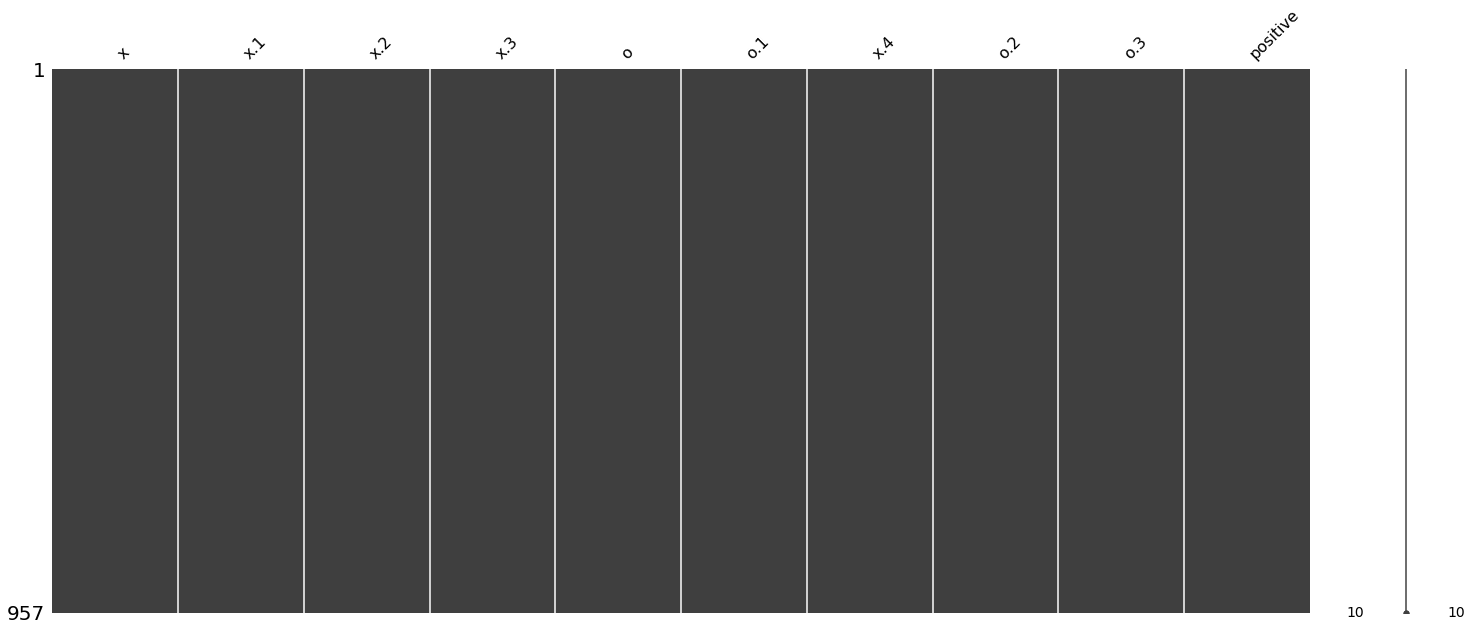

In [15]:
msno.matrix(df)

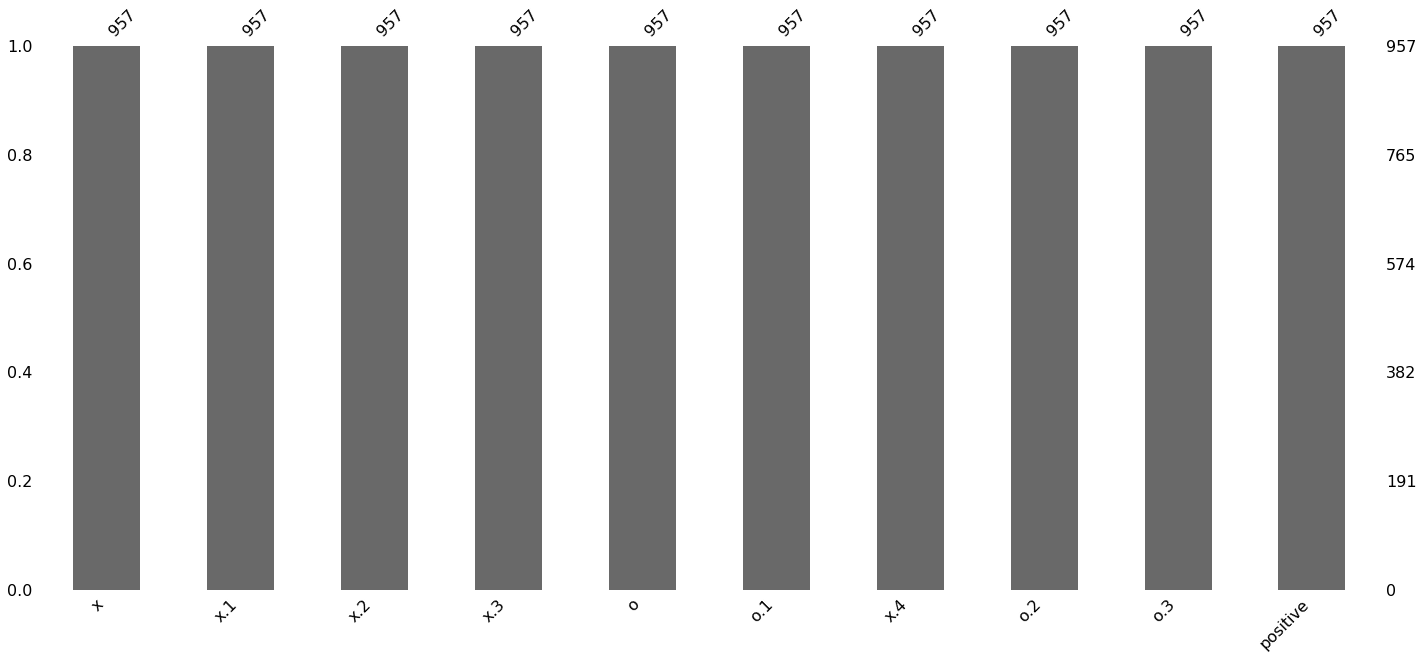

In [16]:
msno.bar(df)

In [18]:
items = (df['x'].unique())
items

array(['x', 'o', 'b'], dtype=object)

In [19]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [20]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()


,b,o,x
0,0,1,1
1,0,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [21]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

Processing 3 combinations | Sampling itemset size 3


,support,itemsets
0,0.91954,(b)
1,1.00000,(o)
2,1.00000,(x)
3,0.91954,"(o, b)"
4,0.91954,"(b, x)"


In [22]:
freq_items.itemsets.unique()

array([frozenset({'b'}), frozenset({'o'}), frozenset({'x'}),
       frozenset({'o', 'b'}), frozenset({'b', 'x'}),
       frozenset({'o', 'x'}), frozenset({'o', 'b', 'x'})], dtype=object)

In [23]:
rules = association_rules(freq_items, min_threshold=0.6)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(o),(b),1.00000,0.91954,0.91954,0.91954,1.0,0.0,1.0
1,(b),(o),0.91954,1.00000,0.91954,1.00000,1.0,0.0,inf
2,(b),(x),0.91954,1.00000,0.91954,1.00000,1.0,0.0,inf
3,(x),(b),1.00000,0.91954,0.91954,0.91954,1.0,0.0,1.0
4,(o),(x),1.00000,1.00000,1.00000,1.00000,1.0,0.0,inf
5,(x),(o),1.00000,1.00000,1.00000,1.00000,1.0,0.0,inf
6,"(o, b)",(x),0.91954,1.00000,0.91954,1.00000,1.0,0.0,inf
7,"(o, x)",(b),1.00000,0.91954,0.91954,0.91954,1.0,0.0,1.0
8,"(b, x)",(o),0.91954,1.00000,0.91954,1.00000,1.0,0.0,inf
9,(o),"(b, x)",1.00000,0.91954,0.91954,0.91954,1.0,0.0,1.0
